In [1]:
import pandas as pd

df_applications_cleaned = pd.read_csv('cleaned_applications.csv')
df_loans_cleaned = pd.read_csv('cleaned_loans.csv')
df_defaults_cleaned = pd.read_csv('cleaned_defaults.csv')
df_branches_cleaned = pd.read_csv('cleaned_branches.csv')
df_customers_cleaned = pd.read_csv('cleaned_customers.csv')

print("Head of cleaned_applications.csv:")
display(df_applications_cleaned.head())

print("\nHead of cleaned_loans.csv:")
display(df_loans_cleaned.head())

print("\nHead of cleaned_defaults.csv:")
display(df_defaults_cleaned.head())

print("\nHead of cleaned_branches.csv:")
display(df_branches_cleaned.head())

print("\nHead of cleaned_customers.csv:")
display(df_customers_cleaned.head())

Head of cleaned_applications.csv:


Application_ID  Loan_ID Customer_ID Application_Date Approval_Date  \
0        A000001  L000001     C000001       2022-05-11    2020-10-02   
1        A000002  L000002     C000002       2022-03-18    2022-11-29   
2        A000003  L000003     C000003       2022-01-17    2023-07-01   
3        A000004  L000004     C000004       2019-03-09    2024-08-30   
4        A000005  L000005     C000005       2024-07-18    2020-03-18   

      Loan_Purpose Source_Channel  Processing_Fee Approval_Status  \
0         Business          Agent            6427        Approved   
1        Education         Online            8605        Approved   
2         Business         Online            1450        Approved   
3  Home Renovation          Agent            8171        Approved   
4        Education         Branch            4931        Approved   

  Rejection_Reason  
0   Not Applicable  
1   Not Applicable  
2   Not Applicable  
3   Not Applicable  
4   Not Applicable


Head of cleaned_loans.csv:


Loan_ID Customer_ID  Loan_Amount  Interest_Rate  Loan_Term Disbursal_Date  \
0  L000001     C045929      4030468           8.45         24     2023-03-25   
1  L000002     C038991      3498647          11.90         48     2023-10-23   
2  L000003     C046662      4871438           9.74         24     2024-07-30   
3  L000004     C040268       541515          13.55         24     2024-11-22   
4  L000005     C067057       631036          10.10         36     2024-03-30   

  Repayment_Start_Date Repayment_End_Date Loan_Status  Overdue_Amount  \
0           2023-04-25         2025-03-25      Active               0   
1           2023-11-23         2027-10-23      Closed           44003   
2           2024-08-30         2026-07-30     Overdue               0   
3           2024-12-22         2026-11-22      Active               0   
4           2024-04-30         2027-03-30     Overdue               0   

   EMI_Amount Collateral_Details  
0       18668           Property  
1       36012           Property  
2       26347     Not Applicable  
3       16106     Not Applicable  
4       10127     Not Applicable


Head of cleaned_defaults.csv:


Default_ID  Loan_ID Customer_ID Default_Date  Default_Amount  \
0    D000001  L007312     C007312   2022-07-20           94480   
1    D000002  L028234     C028234   2023-09-23           10912   
2    D000003  L008319     C008319   2024-08-04           73711   
3    D000004  L046668     C046668   2021-10-16           48955   
4    D000005  L082934     C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  
0           Job Loss            Full            30360          Yes  
1           Job Loss         Partial                0          Yes  
2              Other  Not Applicable             9866          Yes  
3              Other  Not Applicable                0          Yes  
4  Medical Emergency  Not Applicable                0           No


Head of cleaned_branches.csv:


Branch_ID             Branch_Name   Region  Total_Customers  \
0      B001    Dhar, Kant and Madan     West             2891   
1      B002              Shan Group     East             4459   
2      B003        Sachdev-Banerjee  Central             2504   
3      B004            Kapadia-Brar     East             1542   
4      B005  Mangal, Kaur and Borde    South              945   

   Total_Active_Loans  Delinquent_Loans  Loan_Disbursement_Amount  \
0                 279                21                 341680882   
1                1201               149                  96549019   
2                 122               168                 445787808   
3                1422                96                 353934299   
4                1613                87                 311637902   

   Avg_Processing_Time  Relationship_Manager_Count  
0                    6                          29  
1                    8                          35  
2                   12                          48  
3                    9                          50  
4                   11                          10


Head of cleaned_customers.csv:


Customer_ID      Full_Name  Contact_Number  \
0     C000001   Shayak Kumar      1549750578   
1     C000002    Divij Ghosh      2121540709   
2     C000003  Rhea Bhargava    910320534937   
3     C000004  Indrans Walia      6566372162   
4     C000005    Saanvi Chad      9281095585   

                              Email                                  Address  \
0  saxenaindrans@gopal-krishnan.com  27/062\nSangha Nagar, Bongaigaon 736150   
1           ramanindranil@tella.com   H.No. 20, Edwin Circle\nKatihar 892167   
2             bahlelakshi@mall.info       67/386\nComar Nagar, Chapra 137669   
3                akadakia@yahoo.com      88\nDhillon Ganj\nJamshedpur-816278   
4               arhaan11@master.net        011, Kunda Marg\nHyderabad-505161   

   Age  Gender Marital_Status Employment_Status  Annual_Income  Credit_Score  \
0   53    Male         Single        Unemployed         886810           433   
1   62  Female         Single     Self-Employed         396746           418   
2   62   Other         Single     Self-Employed        1118591           736   
3   59  Female         Single          Salaried         524075           353   
4   56    Male         Single     Self-Employed        1219355           735   

      Region  Account_Tenure Relationship_Manager_ID  
0      North              12                  RM0015  
1       West              10                  RM0276  
2  Northeast               9                  RM0098  
3    Central              11                  RM0231  
4       West               1                  RM0107

In [2]:
merged_df = pd.merge(df_loans_cleaned, df_customers_cleaned, on='Customer_ID', how='left')
merged_df = pd.merge(merged_df, df_defaults_cleaned, on='Loan_ID', how='left')
merged_df['Is_Default'] = merged_df['Default_ID'].notnull().astype(int)
display(merged_df.head())

Loan_ID Customer_ID_x  Loan_Amount  Interest_Rate  Loan_Term  \
0  L000001       C045929      4030468           8.45         24   
1  L000002       C038991      3498647          11.90         48   
2  L000003       C046662      4871438           9.74         24   
3  L000004       C040268       541515          13.55         24   
4  L000005       C067057       631036          10.10         36   

  Disbursal_Date Repayment_Start_Date Repayment_End_Date Loan_Status  \
0     2023-03-25           2023-04-25         2025-03-25      Active   
1     2023-10-23           2023-11-23         2027-10-23      Closed   
2     2024-07-30           2024-08-30         2026-07-30     Overdue   
3     2024-11-22           2024-12-22         2026-11-22      Active   
4     2024-03-30           2024-04-30         2027-03-30     Overdue   

   Overdue_Amount  ...  Relationship_Manager_ID Default_ID Customer_ID_y  \
0               0  ...                   RM0150        NaN           NaN   
1           44003  ...                   RM0082        NaN           NaN   
2               0  ...                   RM0296        NaN           NaN   
3               0  ...                   RM0308        NaN           NaN   
4               0  ...                   RM0426        NaN           NaN   

   Default_Date Default_Amount Default_Reason  Recovery_Status  \
0           NaN            NaN            NaN              NaN   
1           NaN            NaN            NaN              NaN   
2           NaN            NaN            NaN              NaN   
3           NaN            NaN            NaN              NaN   
4           NaN            NaN            NaN              NaN   

  Recovery_Amount Legal_Action Is_Default  
0             NaN          NaN          0  
1             NaN          NaN          0  
2             NaN          NaN          0  
3             NaN          NaN          0  
4             NaN          NaN          0  

[5 rows x 34 columns]

In [3]:
correlation_cols = ['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Is_Default']
correlation_matrix = merged_df[correlation_cols].corr()
display(correlation_matrix)

Loan_Amount  Interest_Rate  Credit_Score  Is_Default
Loan_Amount       1.000000      -0.003451      0.000262   -0.002401
Interest_Rate    -0.003451       1.000000      0.002498   -0.004763
Credit_Score      0.000262       0.002498      1.000000   -0.001724
Is_Default       -0.002401      -0.004763     -0.001724    1.000000

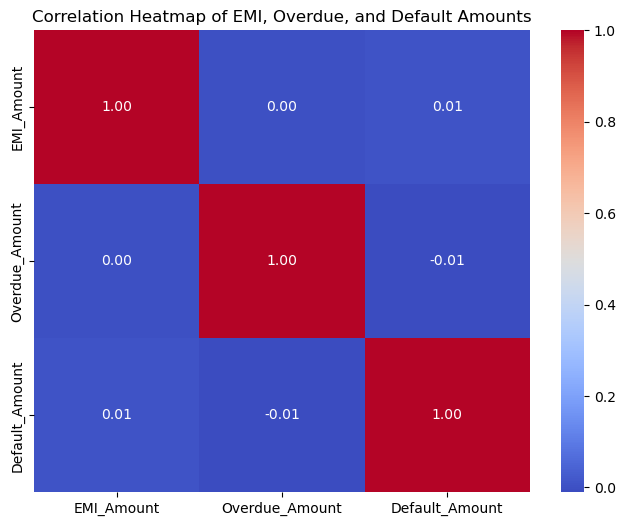

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_cols_heatmap = ['EMI_Amount', 'Overdue_Amount', 'Default_Amount']
correlation_matrix_heatmap = merged_df[correlation_cols_heatmap].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of EMI, Overdue, and Default Amounts')
plt.show()

In [5]:
merged_customer_branch = pd.merge(df_customers_cleaned, df_branches_cleaned, on='Region', how='left')
merged_applications_customer_branch = pd.merge(df_applications_cleaned, merged_customer_branch, on='Customer_ID', how='left')
merged_df_with_branches = pd.merge(merged_df, merged_applications_customer_branch[['Loan_ID', 'Branch_ID', 'Delinquent_Loans', 'Loan_Disbursement_Amount']].drop_duplicates(subset=['Loan_ID']), on='Loan_ID', how='left')

branch_default_rates = merged_df_with_branches.groupby('Branch_ID')['Is_Default'].mean().reset_index()

branch_performance = pd.merge(branch_default_rates, df_branches_cleaned[['Branch_ID', 'Delinquent_Loans', 'Loan_Disbursement_Amount']].drop_duplicates(subset=['Branch_ID']), on='Branch_ID', how='left')

correlation_delinquent = branch_performance['Is_Default'].corr(branch_performance['Delinquent_Loans'])
correlation_disbursement = branch_performance['Is_Default'].corr(branch_performance['Loan_Disbursement_Amount'])

print(f"Correlation between Branch Default Rate and Delinquent Loans: {correlation_delinquent:.2f}")
print(f"Correlation between Branch Default Rate and Loan Disbursement Amount: {correlation_disbursement:.2f}")

Correlation between Branch Default Rate and Delinquent Loans: 0.23
Correlation between Branch Default Rate and Loan Disbursement Amount: 0.02
